In [2]:
import numpy as np
import pandas as pd
import os
import datetime as dt
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Fent el df

In [3]:
#llegeix totes les dades de data i les posa al df
files = [("data/" + f) for f in os.listdir("data/") if f.endswith('.csv')]
df = pd.concat(map(pd.read_csv, files))

In [4]:
tags = ["User", "Email", "Billable", "Task", "Tags", "Amount ()"]
    
df.drop(tags, axis=1, inplace=True)

df

,Client,Project,Description,Start date,Start time,End date,End time,Duration
0,Vida Adulta,Neteja,Plats,2022-01-31,01:18:43,2022-01-31,02:19:33,01:00:50
1,Universitat,Erasmus,Gestió,2022-01-31,10:45:00,2022-01-31,11:00:00,00:15:00
2,Universitat,Erasmus,Gestió,2022-01-31,11:50:14,2022-01-31,11:56:14,00:06:00
3,Universitat,Anàlisi Matemàtica,Examens,2022-01-31,12:01:14,2022-01-31,12:34:14,00:33:00
4,Universitat,Anàlisi Matemàtica,Examens,2022-01-31,12:35:14,2022-01-31,13:20:14,00:45:00
...,...,...,...,...,...,...,...,...
44,Habilitats,Projectes,Outer Wilds Viquipèdia,2022-01-15,19:15:00,2022-01-15,19:30:00,00:15:00
45,Habilitats,Projectes,Outer Wilds Viquipèdia,2022-01-15,20:40:00,2022-01-15,21:00:00,00:20:00
46,Universitat,Visió Artificial,Face Recognition,2022-01-16,18:09:38,2022-01-16,18:38:40,00:29:02
47,Universitat,Visió Artificial,Face Recognition,2022-01-16,18:59:28,2022-01-16,19:05:14,00:05:46


In [5]:
toDate = ['Start date', "Start time", "End date", "End time", "Duration"]
toString = ["Client", "Project", "Description"]

for item in ["Start date", "End date"]:
    df[item] = pd.to_datetime(df[item])

for item in toString:
    df[item] = df[item].astype(str)

In [6]:
df.dtypes

Client                 object
Project                object
Description            object
Start date     datetime64[ns]
Start time             object
End date       datetime64[ns]
End time               object
Duration               object
dtype: object

In [7]:
uni_cond = df["Client"] == "Universitat"
adulting_cond = df["Client"] == "Vida Adulta"
hab_cond = df["Client"] == "Habilitats"

uni_df = pd.DataFrame(df[uni_cond])
adulting_df = pd.DataFrame(df[adulting_cond])
hab_df = pd.DataFrame(df[hab_cond])

In [8]:
hab_df

,Client,Project,Description,Start date,Start time,End date,End time,Duration
13,Habilitats,Projectes,Outer Wilds Viquipèdia,2022-02-02,22:54:51,2022-02-02,23:42:53,00:48:02
14,Habilitats,Projectes,Outer Wilds Viquipèdia,2022-02-02,23:45:38,2022-02-03,01:04:40,01:19:02
15,Habilitats,Projectes,Outer Wilds Viquipèdia,2022-02-03,11:17:07,2022-02-03,12:19:14,01:02:07
17,Habilitats,Projectes,Outer Wilds Viquipèdia,2022-02-03,13:15:09,2022-02-03,13:31:10,00:16:01
0,Habilitats,Italià,Duolingo,2022-02-28,09:44:35,2022-02-28,10:15:20,00:30:45
...,...,...,...,...,...,...,...,...
10,Habilitats,Salut,Esport,2022-02-18,20:48:25,2022-02-18,21:18:33,00:30:08
31,Habilitats,Projectes,Outer Wilds Viquipèdia,2022-01-13,22:41:47,2022-01-13,23:47:45,01:05:58
43,Habilitats,Projectes,Outer Wilds Viquipèdia,2022-01-15,00:11:37,2022-01-15,01:15:37,01:04:00
44,Habilitats,Projectes,Outer Wilds Viquipèdia,2022-01-15,19:15:00,2022-01-15,19:30:00,00:15:00


## Informació Universitat

In [19]:
def total_hours(dataframe, start, end):
    
    tmp_df = dataframe[dataframe["End date"] <= end]
    tmp_df = tmp_df[tmp_df["Start date"] >= start]
    projectes = tmp_df["Project"].drop_duplicates()    

    return [(p, pd.to_timedelta(tmp_df[tmp_df["Project"] == p]["Duration"]).sum()) for p in projectes]

def to_hours(time):
    tup = time.components
    return round(tup[0]*24+tup[1]+tup[2]/60.+tup[3]/3600., 2)

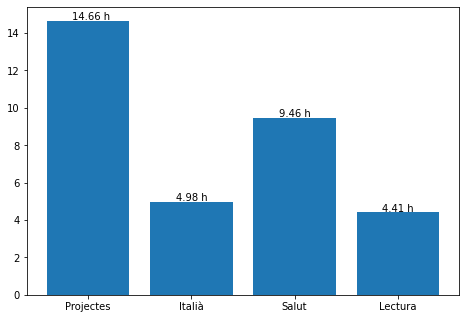

In [18]:
result = total_hours(hab_df, dt.datetime.fromisoformat('2022-01-01'), dt.datetime.fromisoformat('2022-03-20'))
labels, time = list(zip(*result))

hours = [to_hours(t) for t in time]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

for index, value in enumerate(hours):
    plt.text(index-0.15, value+0.06, str(value)+" h")

ax.bar(labels, hours)
plt.show()

In [24]:
#printeja l'última setmana

def last_week(df):
    result = total_hours(df, dt.datetime.today() - dt.timedelta(days=8), dt.datetime.today())
    result.sort(key=lambda x:x[1], reverse=True)
    
    if(result != []):
        labels, time = list(zip(*result))
    else:
        return -1
    
    hours = [to_hours(t) for t in time]
    
    #bar chart
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])

    for index, value in enumerate(hours):
        plt.text(index-0.15, value+0.06, str(value)+" h")

    ax.bar(labels, hours)
    plt.show()
    
    #pie chart
    plt.pie(hours, labels=labels)
    plt.show()

In [25]:
last_week(uni_df)

-1

In [ ]:
"""
Coses a guays a fer
- Divide the subdataframes into activities
- Week to week average hours (amb puntets per veure la progressió)
- Week to week efficiency/expected hours, accomplishing objectives.
- Most efficient hour
- Maximum throught period finding (like most amount of projects made)
"""